In [14]:
#This notebook will be a whiteboard for my attempt to replicate
#this paper: https://repository.upenn.edu/cgi/viewcontent.cgi?article=1451&context=statistics_papers
#Our focus will be on zero-sum games/metagames, since thats what most my research entails

#Here will construct our aysmmetric matrix from csv file and map it to our action space
import numpy as np
import csv
np.set_printoptions(precision=3, suppress=True)


#This will be our meta_game action space
action_space = []
file = 'F19PRUlt.csv'
#We will survey the csv file to fill our action space
with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        if row['Player1'] not in action_space:
            action_space.append(row['Player1'])
        
        if row['Player2'] not in action_space:
            action_space.append(row['Player2'])

#Create action_to_index utility dictionary
index = 0
action_to_index = {}
for action in action_space:
    action_to_index[action] = index
    index += 1

#We will generate our dual variables.. intialize them to 0 and attempt to constuct
#a mixed strategy from it
dual_variables = {}
joint = []
for i in range(len(action_space)):
    for j in range(len(action_space)):
        if j != i:
            #Since this is a meta_game, both players cannot select the same strategy (may not apply to all games)
            joint_action = (action_space[i], action_space[j])
            joint.append(joint_action)
            dual_variables[joint_action] = 0

#print(dual_variables)
print(joint)
print(action_to_index)

[('NegativeV', 'MANTRA'), ('NegativeV', 'Jujuace'), ('NegativeV', 'Zapfreak'), ('NegativeV', 'Manny'), ('MANTRA', 'NegativeV'), ('MANTRA', 'Jujuace'), ('MANTRA', 'Zapfreak'), ('MANTRA', 'Manny'), ('Jujuace', 'NegativeV'), ('Jujuace', 'MANTRA'), ('Jujuace', 'Zapfreak'), ('Jujuace', 'Manny'), ('Zapfreak', 'NegativeV'), ('Zapfreak', 'MANTRA'), ('Zapfreak', 'Jujuace'), ('Zapfreak', 'Manny'), ('Manny', 'NegativeV'), ('Manny', 'MANTRA'), ('Manny', 'Jujuace'), ('Manny', 'Zapfreak')]
{'NegativeV': 0, 'MANTRA': 1, 'Jujuace': 2, 'Zapfreak': 3, 'Manny': 4}


In [15]:
#Here will construct our aysmmetric matrix from csv file and map it to our action space
import numpy as np
import csv
np.set_printoptions(precision=3, suppress=True)

"""
with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    #Create two dictionaries to keep track of wins and losses over matches
    matches = []
    wins_i = {}
    wins_j = {}
    
    for row in csv_reader:
        i = row["Player1"]
        j = row["Player2"]
        match = (i, j)
        matchPrime = (j, i)
        win_i = float(row["Wins"])
        win_j = float(row["Loss"])
        
        if (i in action_space) and (j in action_space):
            if (match in matches) or (matchPrime in matches):
                if match in matches:
                    wins_i[match] += win_i
                    wins_j[match] += win_j
                else:
                    wins_i[matchPrime] += win_j
                    wins_j[matchPrime] += win_i
            else:
                matches.append(match)
                wins_i[match] = win_i
                wins_j[match] = win_j
"""
with open(file, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    #Create two dictionaries to keep track of wins and losses over matches
    matches = []
    pay = {}
    
    for row in csv_reader:
        i = row["Player1"]
        j = row["Player2"]
        match = (i, j)
        matchPrime = (j, i)
        p = float(row["Pay"])
        if (i in action_space) and (j in action_space):
            if (match in matches) or (matchPrime in matches):
                print("in match")
                if match in matches:
                    pay[match] += p
                else:
                    pay[matchPrime] += p
            else:
                matches.append(match)
                pay[match] = p

#Create payoff matrix
M = np.full((len(action_space), len(action_space)), 0.0)
matchup = [[None]*len(action_space) for i in range(len(action_space))]
for match, p in pay.items():
    print(match, ": ", p)
    name_i, name_j = match
    print((name_i, name_j))
    
    M[action_to_index[name_i]][action_to_index[name_j]] = p
    M[action_to_index[name_j]][action_to_index[name_i]] = -p
    matchup[action_to_index[name_i]][action_to_index[name_j]] = (name_i, name_j)
    matchup[action_to_index[name_j]][action_to_index[name_i]] = (name_j, name_i)

#Before logit space
print(M)
#Create logit space
#M = np.log(M/(1-M))
print(M)
for row in matchup:
    print(row)

('NegativeV', 'MANTRA') :  1.714285714
('NegativeV', 'MANTRA')
('NegativeV', 'Jujuace') :  0.142871429
('NegativeV', 'Jujuace')
('NegativeV', 'Zapfreak') :  0.7
('NegativeV', 'Zapfreak')
('NegativeV', 'Manny') :  -1.2
('NegativeV', 'Manny')
('MANTRA', 'Jujuace') :  -0.5666666
('MANTRA', 'Jujuace')
('MANTRA', 'Zapfreak') :  0.125
('MANTRA', 'Zapfreak')
('MANTRA', 'Manny') :  -0.1428571429
('MANTRA', 'Manny')
('Jujuace', 'Zapfreak') :  -0.25
('Jujuace', 'Zapfreak')
('Jujuace', 'Manny') :  -1.66666666
('Jujuace', 'Manny')
('Zapfreak', 'Manny') :  -1.75
('Zapfreak', 'Manny')
[[ 0.     1.714  0.143  0.7   -1.2  ]
 [-1.714  0.    -0.567  0.125 -0.143]
 [-0.143  0.567  0.    -0.25  -1.667]
 [-0.7   -0.125  0.25   0.    -1.75 ]
 [ 1.2    0.143  1.667  1.75   0.   ]]
[[ 0.     1.714  0.143  0.7   -1.2  ]
 [-1.714  0.    -0.567  0.125 -0.143]
 [-0.143  0.567  0.    -0.25  -1.667]
 [-0.7   -0.125  0.25   0.    -1.75 ]
 [ 1.2    0.143  1.667  1.75   0.   ]]
[None, ('NegativeV', 'MANTRA'), ('Negati

In [16]:
def payoff(action_1, action_2):
    return M[action_to_index[action_1]][action_to_index[action_2]]

def payoff_gain(alt_action, action, maximum=False, positive=True):
    #Calculate M(alt_action, action') & M(action, action')
    diff = 0 
    for action_prime in action_space:
        if action_prime is not action:
            M_alt = payoff(alt_action, action_prime)
            M_act = payoff(action, action_prime)
            if maximum:     
                if positive:
                    diff += max(0, M_alt - M_act)
                else:
                    diff += max(0, -(M_alt - M_act))
            else: 
                diff += M_alt - M_act
    
    return diff

#Return Z(lambda) of dual variables
def Z(dv):
    sum_one = 0
    for i in range(len(action_space)):
        action = action_space[i]
        sum_two = 0
        for j in range(len(action_space)):
            action_prime = action_space[j]
            if j != i:
                sum_two += dv[(action, action_prime)] * payoff_gain(action_prime, action)
        sum_one += np.exp(-sum_two)
    return sum_one

#Get mixed strategy from dual variables
def P(dv, a):
    sum_one = 0
    for action in action_space:
        if action != a:
            sum_one += dv[(a, action)]*payoff_gain(action, a)
    
    log_P = -sum_one - np.log(Z(dv))
    return np.exp(log_P)
    

In [17]:
#Test our functions
print(payoff("Manny", "NegativeV"))
print(payoff_gain("Manny", "NegativeV"))
print(P(dual_variables, "Manny"))

1.2
3.4023666599
0.2


In [18]:
def regret_pos(dv, action, action_prime):
    P_a = P(dv, action)
    final_sum = 0
    for p2_action in action_space:
        P_p2 = P(dv, p2_action)
        p_gain = payoff(action_prime, p2_action) - payoff(action, p2_action)
        
        final_sum += (P_a*P_p2) * max(0, p_gain)
        
    return final_sum
            
def regret_neg(dv, action, action_prime):
    P_a = P(dv, action)
    final_sum = 0
    for p2_action in action_space:
        P_p2 = P(dv, p2_action)
        p_gain = payoff(action_prime, p2_action) - payoff(action, p2_action)
        
        final_sum += (P_a*P_p2) * max(0, -p_gain)
        
    return final_sum

def regret_both(dv, action, action_prime):
    P_a = P(dv, action)
    p = 0
    n = 0
    for p2_action in action_space:
        P_p2 = P(dv, p2_action)
        p_gain = payoff(action_prime, p2_action) - payoff(action, p2_action)
        
        p += (P_a*P_p2) * max(0, p_gain)
        n += (P_a*P_p2) * max(0, -p_gain)
        
    return p, n

In [19]:
print(regret_pos(dual_variables, "Manny", "NegativeV"))
print(regret_neg(dual_variables, "Manny", "NegativeV"))
print(regret_both(dual_variables, "Manny", "NegativeV"))

0.06285714284400001
0.19895180924000005
(0.06285714284400001, 0.19895180924000005)


In [20]:
def abs_gain(action, action_prime):
    total = 0
    for p2_action in action_space:
        p_gain = abs(payoff(action_prime, p2_action) - payoff(action, p2_action))
        total += p_gain
    
    return total
        
def lower_bound_c():
    bound = 0
    for action in action_space:
        for action_prime in action_space:
            a_gain = abs_gain(action, action_prime)
            bound += a_gain
    return bound 

In [21]:
print(abs_gain("Manny", "NegativeV"))
print(lower_bound_c())

6.5452238021
100.85714197239996


In [22]:
from tqdm import tqdm 

def sort_dictionary(d):
    sorted_x = sorted(d.items(), key=lambda kv: kv[1])
    return sorted_x

def plot(dv):
    probs = {}
    for action in action_space:
        probs[action] = P(dv,action)
    
    import matplotlib.pyplot as plt; plt.rcdefaults()
    import numpy as np
    import matplotlib.pyplot as plt

    sort = sort_dictionary(probs)
    #For tier lists
    objects = []
    performance = []
    for player, value in sort:
        objects.append(player)
        performance.append(value)


    y_pos = np.arange(len(objects))
    plt.barh(y_pos, performance, align="center")
    plt.yticks(y_pos, objects)
    plt.xlabel('Density')
    plt.ylabel('Strategies')
    plt.title('Maximum Entropy Nash Distribution')

    plt.show()
    
def log_grad_descent(dv, space, rounds=10, verbose=True):
    c = lower_bound_c()
    
    for it in tqdm(range(rounds)):
        step_dict = {}
        for pair in space:
            """
            r_pos = regret_pos(dv, action, action_prime)
            r_neg = regret_neg(dv, action, action_prime)
            """
            
            a1, a2 = pair
            r_pos, r_neg = regret_both(dv, a1, a2)

            #print("Joint Action: ", (action, action_prime))
            #print("r_pos: ", r_pos)
            #print("r_neg: ", r_neg)

            term = ((r_pos)/(r_pos + r_neg)) - (1/2)


            step = (1/c)*term

            step_dict[pair] = step
                
        for pair in joint:
            dv[pair] = max(0, dv[pair] + step_dict[pair])
                
        if verbose:
            print("Iteration ", it)
            plot(dv)

In [23]:
#We will generate our dual variables.. intialize them to 0 and attempt to constuct
#a mixed strategy from it
du = {}
joint = []
for i in range(len(action_space)):
    for j in range(len(action_space)):
        if j != i:
            #Since this is a meta_game, both players cannot select the same strategy (may not apply to all games)
            joint_action = (action_space[i], action_space[j])
            joint.append(joint_action)
            du[joint_action] = 0
        
log_grad_descent(du, joint, verbose=False, rounds=1000)

100%|██████████| 1000/1000 [00:20<00:00, 49.31it/s]


In [24]:
probs = {}
for action in action_space:
    probs[action] = P(du,action)
    print(action, ": ", P(du, action))

NegativeV :  0.01845339904482126
MANTRA :  1.266970326912079e-15
Jujuace :  5.489608115456571e-16
Zapfreak :  1.0468739093849084e-20
Manny :  0.9815466009551769


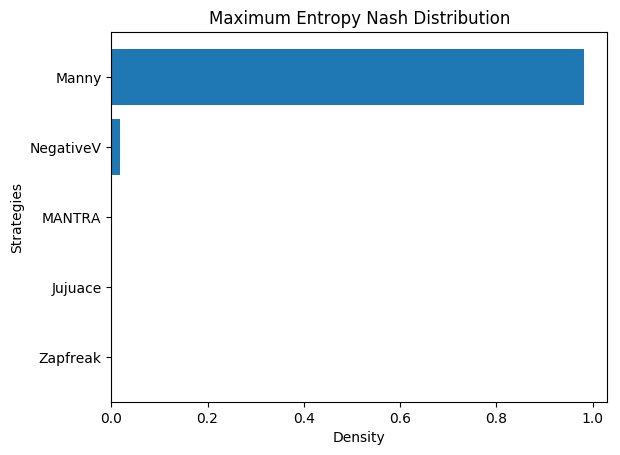

In [25]:
plot(du)

In [15]:
print(du)

{('Blue', 'Toasty'): 3.292931642876077, ('Blue', 'C2'): 0, ('Blue', 'Dabes'): 0, ('Blue', 'Alarm'): 0, ('Toasty', 'Blue'): 0, ('Toasty', 'C2'): 0, ('Toasty', 'Dabes'): 0, ('Toasty', 'Alarm'): 0, ('C2', 'Blue'): 3.9321567292425716, ('C2', 'Toasty'): 4.000658543572075, ('C2', 'Dabes'): 0, ('C2', 'Alarm'): 0, ('Dabes', 'Blue'): 3.9375497138822393, ('Dabes', 'Toasty'): 3.870377395859015, ('Dabes', 'C2'): 3.34552344850577, ('Dabes', 'Alarm'): 0, ('Alarm', 'Blue'): 4.086302713305041, ('Alarm', 'Toasty'): 4.086302713305041, ('Alarm', 'C2'): 3.918095492454819, ('Alarm', 'Dabes'): 4.086302713305041}
